In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten 
from keras.utils.np_utils import to_categorical


sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")

# Sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

In [2]:
train_df = pd.read_csv("C:/Users/GS/Desktop/dataset-mnist/train1.csv")
test_df = pd.read_csv("C:/Users/GS/Desktop/dataset-mnist/test1.csv")

In [3]:
train_df.shape

(42000, 785)

In [4]:
test_df.shape

(28000, 784)

In [5]:
train_df.isnull().sum().sum()

0

In [6]:
test_df.isnull().sum().sum()

0

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

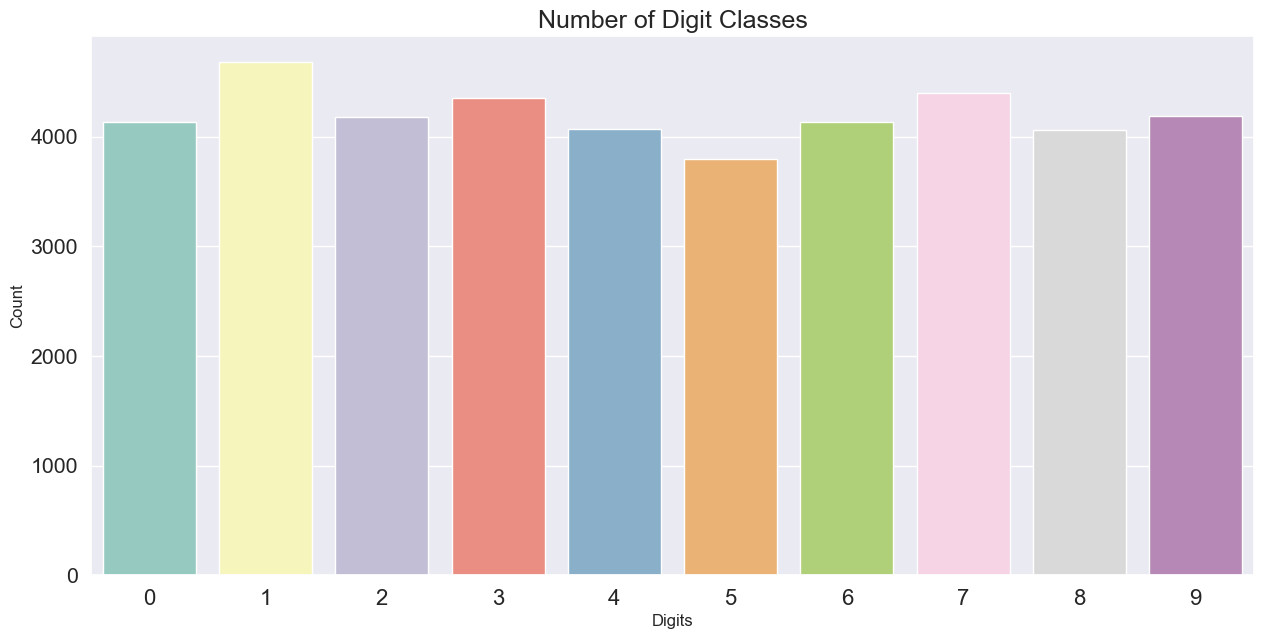

In [7]:
plt.figure(figsize=(15,7))
g = sns.countplot(x = train_df['label'], palette = 'Set3')
plt.title("Number of Digit Classes", size = 18)
plt.xticks(size = 16)
plt.xlabel("Digits", size = 12)
plt.ylabel("Count", size =12)
train_df['label'].value_counts()

In [8]:
X_train = (train_df.drop(['label'], 1).values).astype('float32')
y_train = (train_df['label'].values).astype('int32')
X_test = test_df.values.astype('float32')

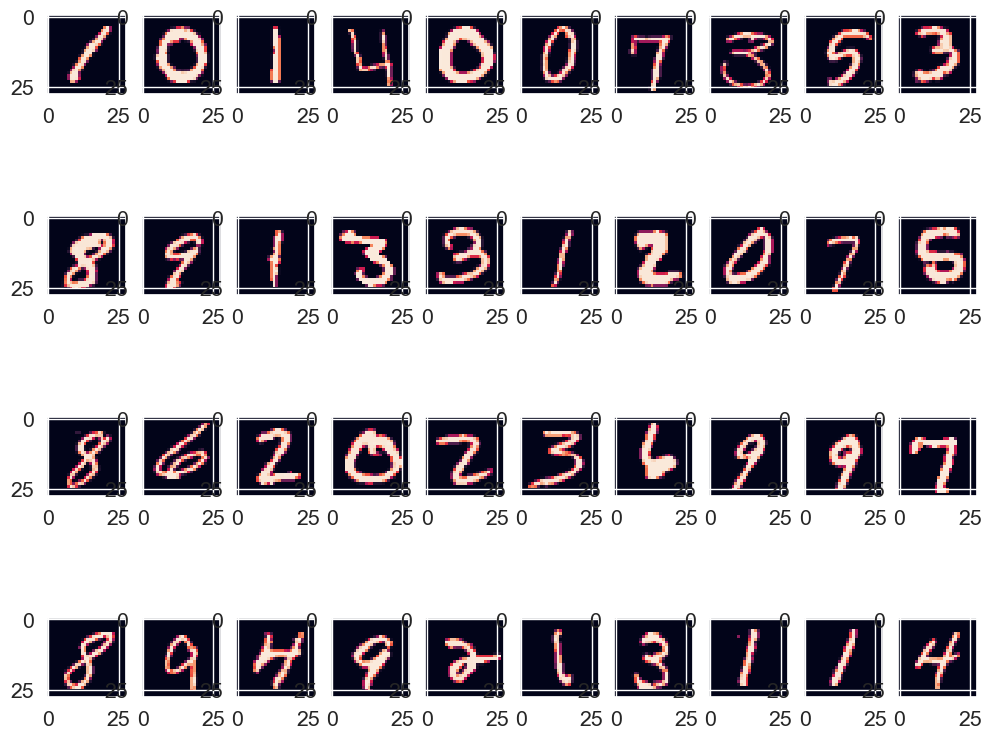

In [9]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes = 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [11]:
model=Sequential()
 
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=15,
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False) 

In [15]:
batch_size = 64
epochs = 20

In [16]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/20
590/590 [==============================] - 270s 452ms/step - loss: 0.1636 - accuracy: 0.9480 - val_loss: 0.0414 - val_accuracy: 0.9848 - lr: 0.0010
Epoch 2/20
590/590 [==============================] - 266s 450ms/step - loss: 0.0724 - accuracy: 0.9773 - val_loss: 0.0669 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 3/20
590/590 [==============================] - 266s 451ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0574 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 4/20
590/590 [==============================] - 265s 449ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0523 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 5/20
590/590 [==============================] - 264s 447ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0395 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 6/20
590/590 [==============================] - 266s 451ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0331 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 7/20
590/590 [==========================

In [2]:

model.save("project.h5")
from tensorflow import keras
model = keras.models.load_model("project.h5")



In [6]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

NameError: name 'X_val' is not defined

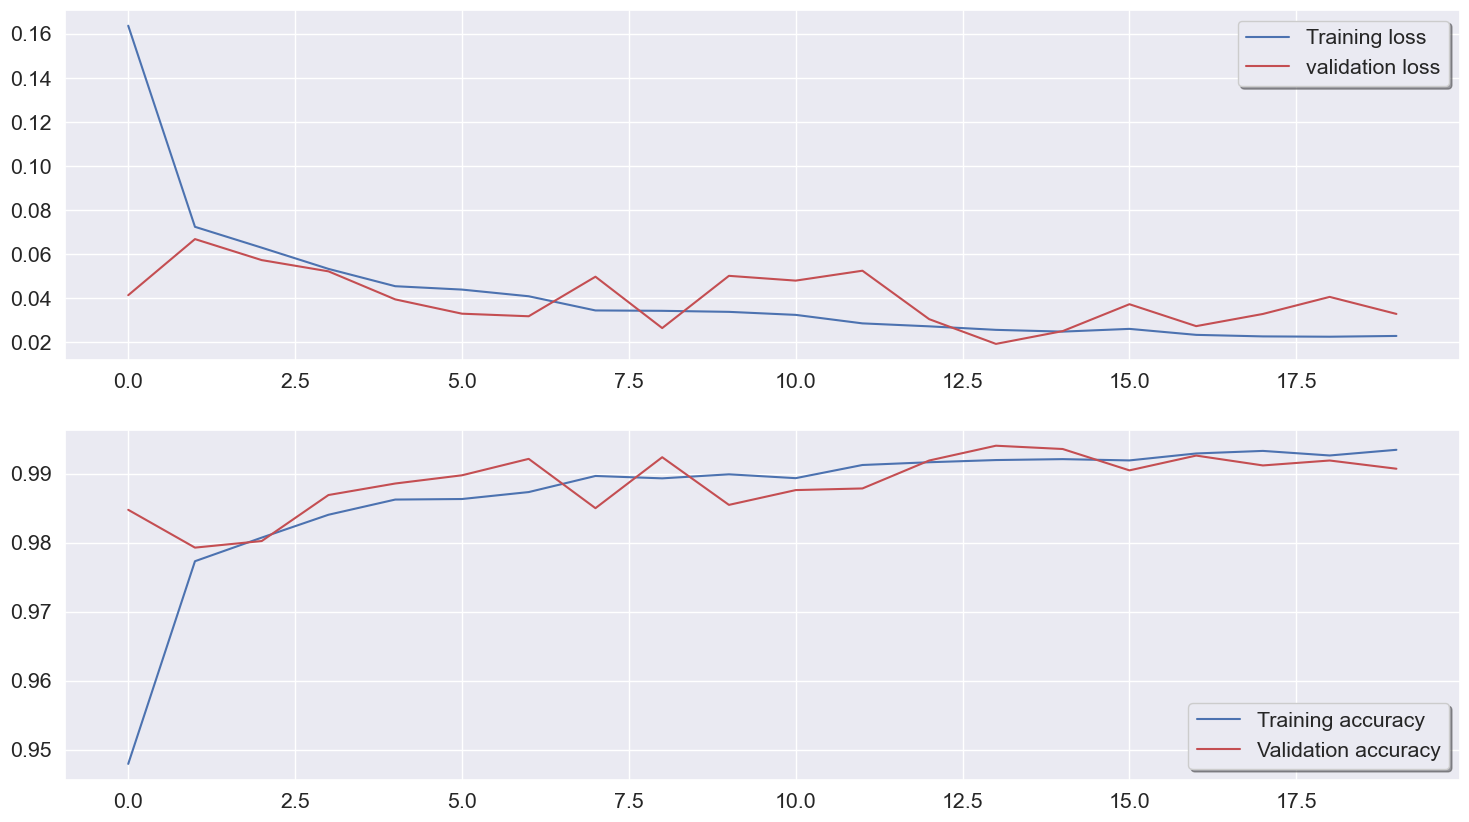

In [18]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(h.history['loss'], color='b', label="Training loss")
ax[0].plot(h.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(h.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(h.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

132/132 [==============================] - 4s 32ms/step


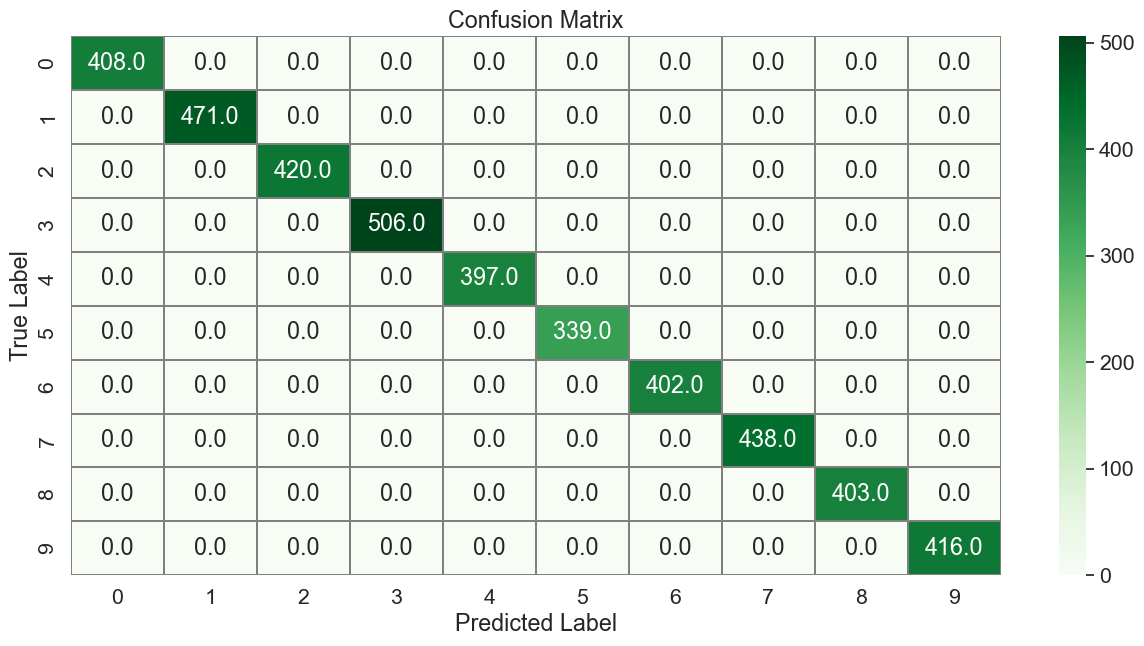

In [19]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_val,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(15, 7))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

132/132 [==============================] - 4s 32ms/step


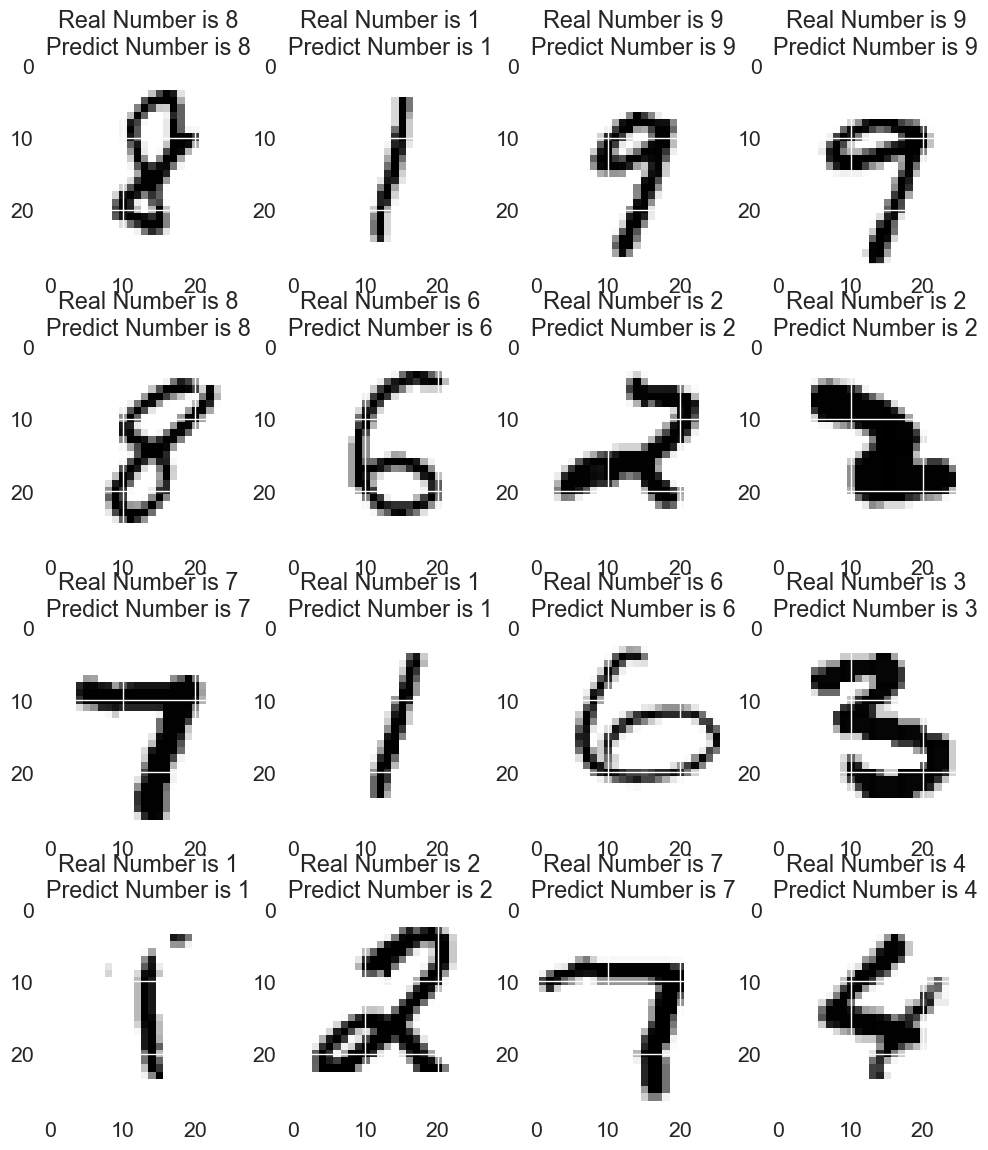

In [20]:
Y_pred = model.predict(X_val)
X_val__ = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_val__[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_val[i].argmax()}\nPredict Number is {Y_pred[i].argmax()}")

In [1]:

import gradio as gr
import numpy as np
import tensorflow.keras as keras

# load the model from a saved file
model = keras.models.load_model("project.h5")

# define the predict_image function
def predict_image(img1):
    img_3d=img1.reshape(-1,28,28)
    im_resize=img_3d/255
    prediction=model.predict(im_resize)
    Y_pred=np.argmax(prediction)
    return str(Y_pred)  # convert to string before returning

# define the Gradio interface
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")
iface.launch()

C:\Users\GS\anaconda3\lib\site-packages\gradio\utils.py:85: UserWarning: unable to parse version details from package URL.
  warnings.warn("unable to parse version details from package URL.")


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 95ms/step
